# P2 - API Precio Vehículos Usados

Elaborado por GRUPO 1:
- Juanita Piraban Barbosa - 201216313
- Lorena Morales Rodríguez - 202027957
- Alejandro Barinas Guio - 201628859
- Jaime Humberto Trujillo Perea - 201920366
- Alexander Zapata Galindo - 201425426

In [22]:
# Importar Librerias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import csv
import sys
import plotly as pt
import plotly.express as px
import statsmodels.api as sm

from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.tsaplots import plot_pacf
from statsmodels.tsa.arima_model import ARIMA
from sklearn import metrics
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split 

from matplotlib import pyplot
from pandas import DatetimeIndex
from pandas import Series
from tabulate import tabulate
from pandas import DataFrame

from prophet import Prophet
from prophet.plot import add_changepoints_to_plot
from prophet.diagnostics import performance_metrics
from prophet.plot import plot_cross_validation_metric
from prophet.diagnostics import cross_validation

import warnings
warnings.filterwarnings('ignore')

%matplotlib inline
sns.set()  

In [23]:
# Leer el archivo 'datos.csv'
data = pd.read_csv("DataSet/dataTraincarListings.csv")

## Introduction

- 1.2 Million listings scraped from TrueCar.com - Price, Mileage, Make, Model dataset from Kaggle
- Each observation represents the price of an used car

In [24]:
data.head()

,Price,Year,Mileage,State,Make,Model
0,21490,2014,31909,MD,Nissan,MuranoAWD
1,21250,2016,25741,KY,Chevrolet,CamaroCoupe
2,20925,2016,24633,SC,Hyundai,Santa
3,14500,2012,84026,OK,Jeep,Grand
4,32488,2013,22816,TN,Jeep,Wrangler


In [25]:
data.Price.describe()

count    500000.000000
mean      21144.186304
std       10753.259704
min        5001.000000
25%       13499.000000
50%       18450.000000
75%       26998.000000
max       79999.000000
Name: Price, dtype: float64

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


<AxesSubplot:xlabel='Year', ylabel='Price'>

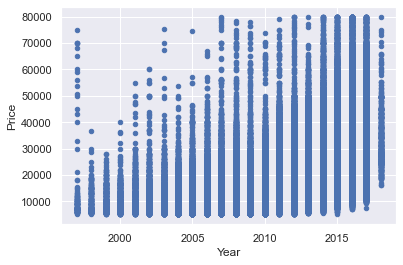

In [26]:
data.plot(kind='scatter', y='Price', x='Year')

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


<AxesSubplot:xlabel='Mileage', ylabel='Price'>

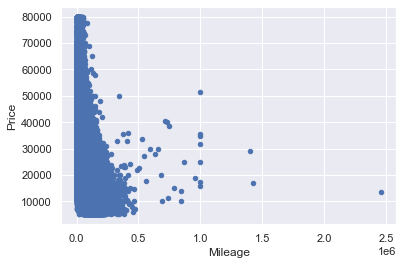

In [27]:
data.plot(kind='scatter', y='Price', x='Mileage')

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


<AxesSubplot:xlabel='State', ylabel='Price'>

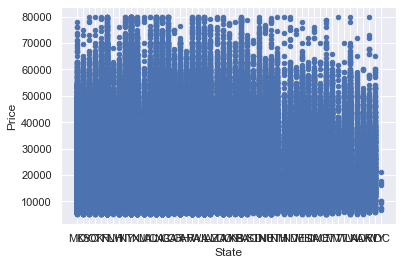

In [28]:
data.plot(kind='scatter', y='Price', x='State')

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


<AxesSubplot:xlabel='Make', ylabel='Price'>

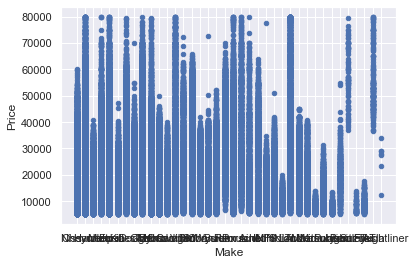

In [29]:
data.plot(kind='scatter', y='Price', x='Make')

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


<AxesSubplot:xlabel='Model', ylabel='Price'>

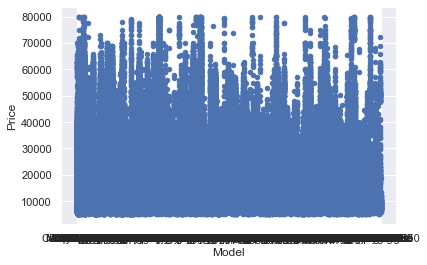

In [30]:
data.plot(kind='scatter', y='Price', x='Model')

## Exercise P2.1 (50%)

Develop a machine learning model that predicts the price of the of car using as an input ['Year', 'Mileage', 'State', 'Make', 'Model']

#### Evaluation:
- 25% - Performance of the models using a manually implemented K-Fold (K=10) cross-validation
- 25% - Notebook explaining the process for selecting the best model. You must specify how the calibration of each of the parameters is done and how these change the performance of the model. It is expected that a clear comparison will be made of all implemented models.. Present the most relevant conslusions about the whole process.

#### Desarrollo:
Para predecir el precio de los vehículos usados, a continuación se entrenan los siguientes modelos:
- Bagging - Linear Regression
- Bagging - Decision Tree
- Random Forest
- XGBoost
- Stacking (Linear Regression, Decision Tree, Random Forest, XGBoost)

In [31]:
# Train/test dataset
X = data[['Year', 'Mileage','State','Make','Model']]
y = data['Price']
dum = pd.get_dummies(data[['State','Make','Model']],drop_first=True)
X_dum = pd.concat([X, dum], axis=1)
X_dum.drop(['State','Make','Model'], inplace=True, axis=1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20,
                                                    random_state=123,
                                                    shuffle=True)

X_dum_train, X_dum_test, y_train, y_test = train_test_split(X_dum, y, test_size=0.20,
                                                    random_state=123,
                                                    shuffle=True)

In [32]:
X_dum_train_1 = pd.DataFrame(X_dum_train['Year'])
X_dum_test_1 = pd.DataFrame(X_dum_test['Year'])

### 0. Regresión Lineal (Prueba)

In [33]:
# Model

lr = LinearRegression()    
lr.fit(X_dum_train_1, y_train )

#model = sm.OLS(y_train, X_dum_train.Year)
#lr = model.fit()
#lr.summary()

LinearRegression()

In [34]:
# RMSE
y_pred = lr.predict(X_dum_test_1)
np.sqrt(mean_squared_error(y_pred, y_test))

9428.41935219634

### 1. Bagging - Regresión Lineal

### 2. Bagging - Arból de Decisión de Regresión

### 3. Random Forest

### 4. XGBoost

### 5. Stacking (Linear Regression, Decision Tree, Random Forest, XGBoost)

### Compración de modelos

### Conclusiones

# Exercise P2.2 (50%)
Create an API of the model.

#### Evaluation:
- 40% - API hosted on a cloud service
- 10% - Show screenshots of the model doing the predictions on the local machine

#### Desarrollo:
Para desarrollar la API se siguieron los siguientes pasos:
- Compilar modelo final (archivo *.pkl)
- Probar modelo en batch
- Crear API
- Ejecutar API
- Probar API

### Compilar modelo final (archivo *pkl)

In [35]:
import pickle

In [36]:
pickle.dump(lr, open('API/phishing_clf.pkl', 'wb'))

### Probar modelo en batch

In [47]:
from API.m09_model_deployment import predict_price

In [48]:
predict_price('2021')

FileNotFoundError: [Errno 2] No such file or directory: './phishing_clf.pkl'

### Crear API

In [ ]:
#pip install Flask

In [18]:
from flask import Flask, request
from API.m09_model_deployment import predict_price

In [51]:
app = Flask(__name__)

@app.route('/predict', methods=['GET'])
def URLpredict():
    return {
         "Price of Car": predict_price(request.args.get('URL'))
        }, 200

### Ejecutar API

In [ ]:
app.run(debug=True, use_reloader=False, host='0.0.0.0')

 * Serving Flask app "__main__" (lazy loading)
 * Environment: production
   Use a production WSGI server instead.
 * Debug mode: on


 * Running on http://0.0.0.0:5000/ (Press CTRL+C to quit)
127.0.0.1 - - [24/Jul/2021 00:19:25] "GET /predict?URL=2021 HTTP/1.1" 500 -
Traceback (most recent call last):
  File "/Users/alexander/opt/anaconda3/lib/python3.8/site-packages/flask/app.py", line 2464, in __call__
    return self.wsgi_app(environ, start_response)
  File "/Users/alexander/opt/anaconda3/lib/python3.8/site-packages/flask/app.py", line 2450, in wsgi_app
    response = self.handle_exception(e)
  File "/Users/alexander/opt/anaconda3/lib/python3.8/site-packages/flask/app.py", line 1867, in handle_exception
    reraise(exc_type, exc_value, tb)
  File "/Users/alexander/opt/anaconda3/lib/python3.8/site-packages/flask/_compat.py", line 39, in reraise
    raise value
  File "/Users/alexander/opt/anaconda3/lib/python3.8/site-packages/flask/app.py", line 2447, in wsgi_app
    response = self.full_dispatch_request()
  File "/Users/alexander/opt/anaconda3/lib/python3.8/site-packages/flask/app.py", line 1952, in full_dispatch_

### Check API

http://localhost:5000/predict?URL=2021